In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
df = pd.read_csv('../dataset/Dataset.csv')
def preprocess_(df):
    X = df.drop(['label'], axis = 1)
    y = df['label']

    df.label = pd.Categorical(df.label)
    y = np.array(df.label.cat.codes)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X, y
X, y = preprocess_(df)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.2, random_state = 42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [9]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = KNN.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion_matrix for default KNN: \n')
print(confusion_matrix(y_test, y_pred))
print('\nMetrics to evaluate default KNN:\n')
print(classification_report(y_test, y_pred))

Confusion_matrix for default KNN: 

[[605  12  18   7   2  10   3   0   2   8]
 [ 19 619   3   0   0  24   1   1   0   0]
 [ 23   2 620  14   5   5   6   9  10  12]
 [  8   1  26 514  16   4   3  25  15   5]
 [  3   0  14  18 507   1   5  23  27   4]
 [ 23  11  14   6   0 640   0   1   3   2]
 [ 17   8  36  22  11   2 532  11   5  41]
 [ 10   2  60  56  54   6  19 333  43  10]
 [  4   0  19  16  24   0   1  20 569   3]
 [ 21  12 118  27   2   5  57  18  24 337]]

Metrics to evaluate default KNN:

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       667
           1       0.93      0.93      0.93       667
           2       0.67      0.88      0.76       706
           3       0.76      0.83      0.79       617
           4       0.82      0.84      0.83       602
           5       0.92      0.91      0.92       700
           6       0.85      0.78      0.81       685
           7       0.76      0.56      0.64       593
           

In [13]:
# Exhaustive search for best paramters

from sklearn.model_selection import GridSearchCV
final_knn = KNeighborsClassifier()
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7],
    'weights': ['uniform', 'distance'],
    'p':[1,2,3]
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")


Best parameters found: {'n_neighbors': 2, 'weights': 'distance'}
Best cross-validation accuracy: 0.8389620486682269


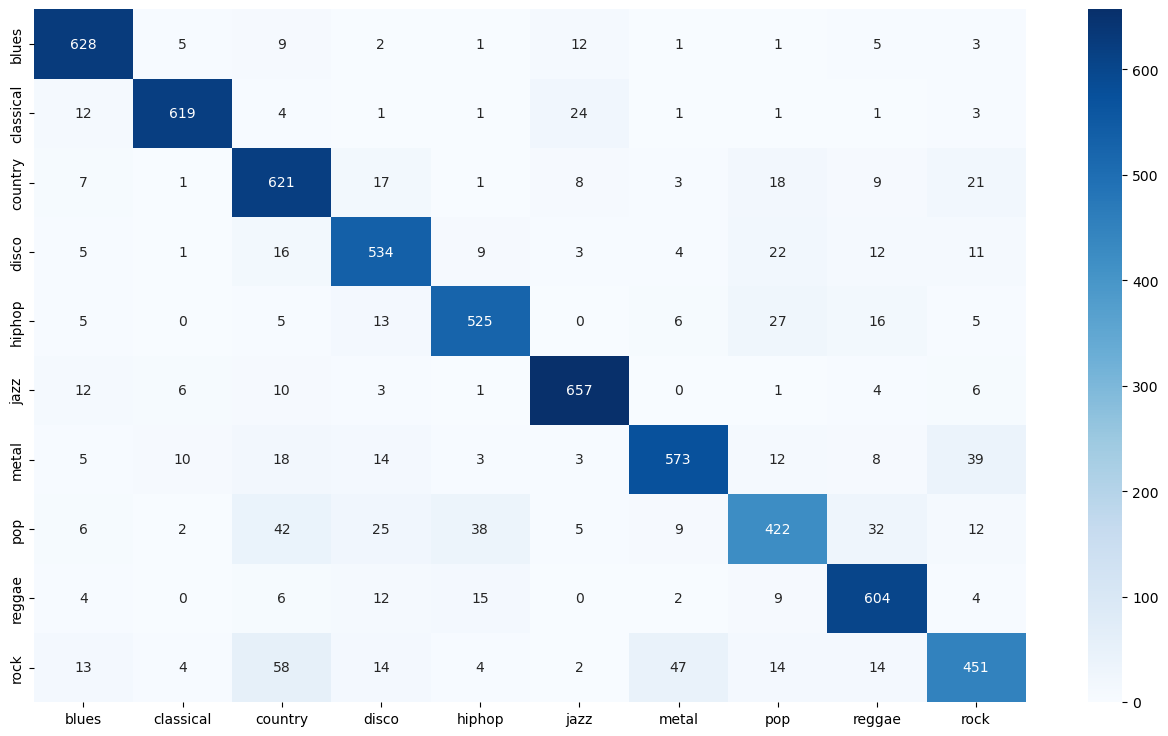

In [14]:
import seaborn as sns
best_knn = KNeighborsClassifier(n_neighbors = 2,weights='distance')
best_knn.fit(x_train, y_train)
preds = best_knn.predict(x_test)

confusion_matr = confusion_matrix(y_test, preds) 
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr,fmt='d', cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

In [15]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       667
           1       0.96      0.93      0.94       667
           2       0.79      0.88      0.83       706
           3       0.84      0.87      0.85       617
           4       0.88      0.87      0.88       602
           5       0.92      0.94      0.93       700
           6       0.89      0.84      0.86       685
           7       0.80      0.71      0.75       593
           8       0.86      0.92      0.89       656
           9       0.81      0.73      0.77       621

    accuracy                           0.86      6514
   macro avg       0.86      0.86      0.86      6514
weighted avg       0.86      0.86      0.86      6514



In [16]:
import os 
import pickle

if os.path.exists('/home/khangpt/MUSIC-GEN-PROJ/saved_model/knn_model.pkl'):
    os.remove('/home/khangpt/MUSIC-GEN-PROJ/saved_model/knn_model.pkl')
with open('/home/khangpt/MUSIC-GEN-PROJ/saved_model/knn_model.pkl','wb') as file:
    pickle.dump(KNN, file)
